In [1]:
import numpy as np
import pandas as pd
dataset= pd.read_csv('C:/Users/hp/Desktop/datasets_228_482_diabetes.csv')
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [2]:
dataset.shape

(768, 9)

In [3]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
dataset_feature= dataset.columns
for feature in dataset_feature:
    p = sns.distplot(a= dataset[feature])
    plt.show()

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

In [6]:
import sweetviz as sv
report= sv.analyze(dataset)

:FEATURES DONE:                    |█████████████████████| [100%]   00:07  -> (00:00 left)
:PAIRWISE DONE:                    |█████████████████████| [100%]   00:00  -> (00:00 left)


Creating Associations graph... DONE!


In [7]:
report.show_html('diabetes.html')

Report diabetes.html was generated! NOTEBOOK/COLAB USERS: no browser will pop up, the report is saved in your notebook/colab files.


In [8]:
dataset_zeros= ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']

In [9]:
dataset[dataset_zeros]= np.where((dataset[dataset_zeros] ==0), np.nan,dataset[dataset_zeros])

In [10]:
dataset.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

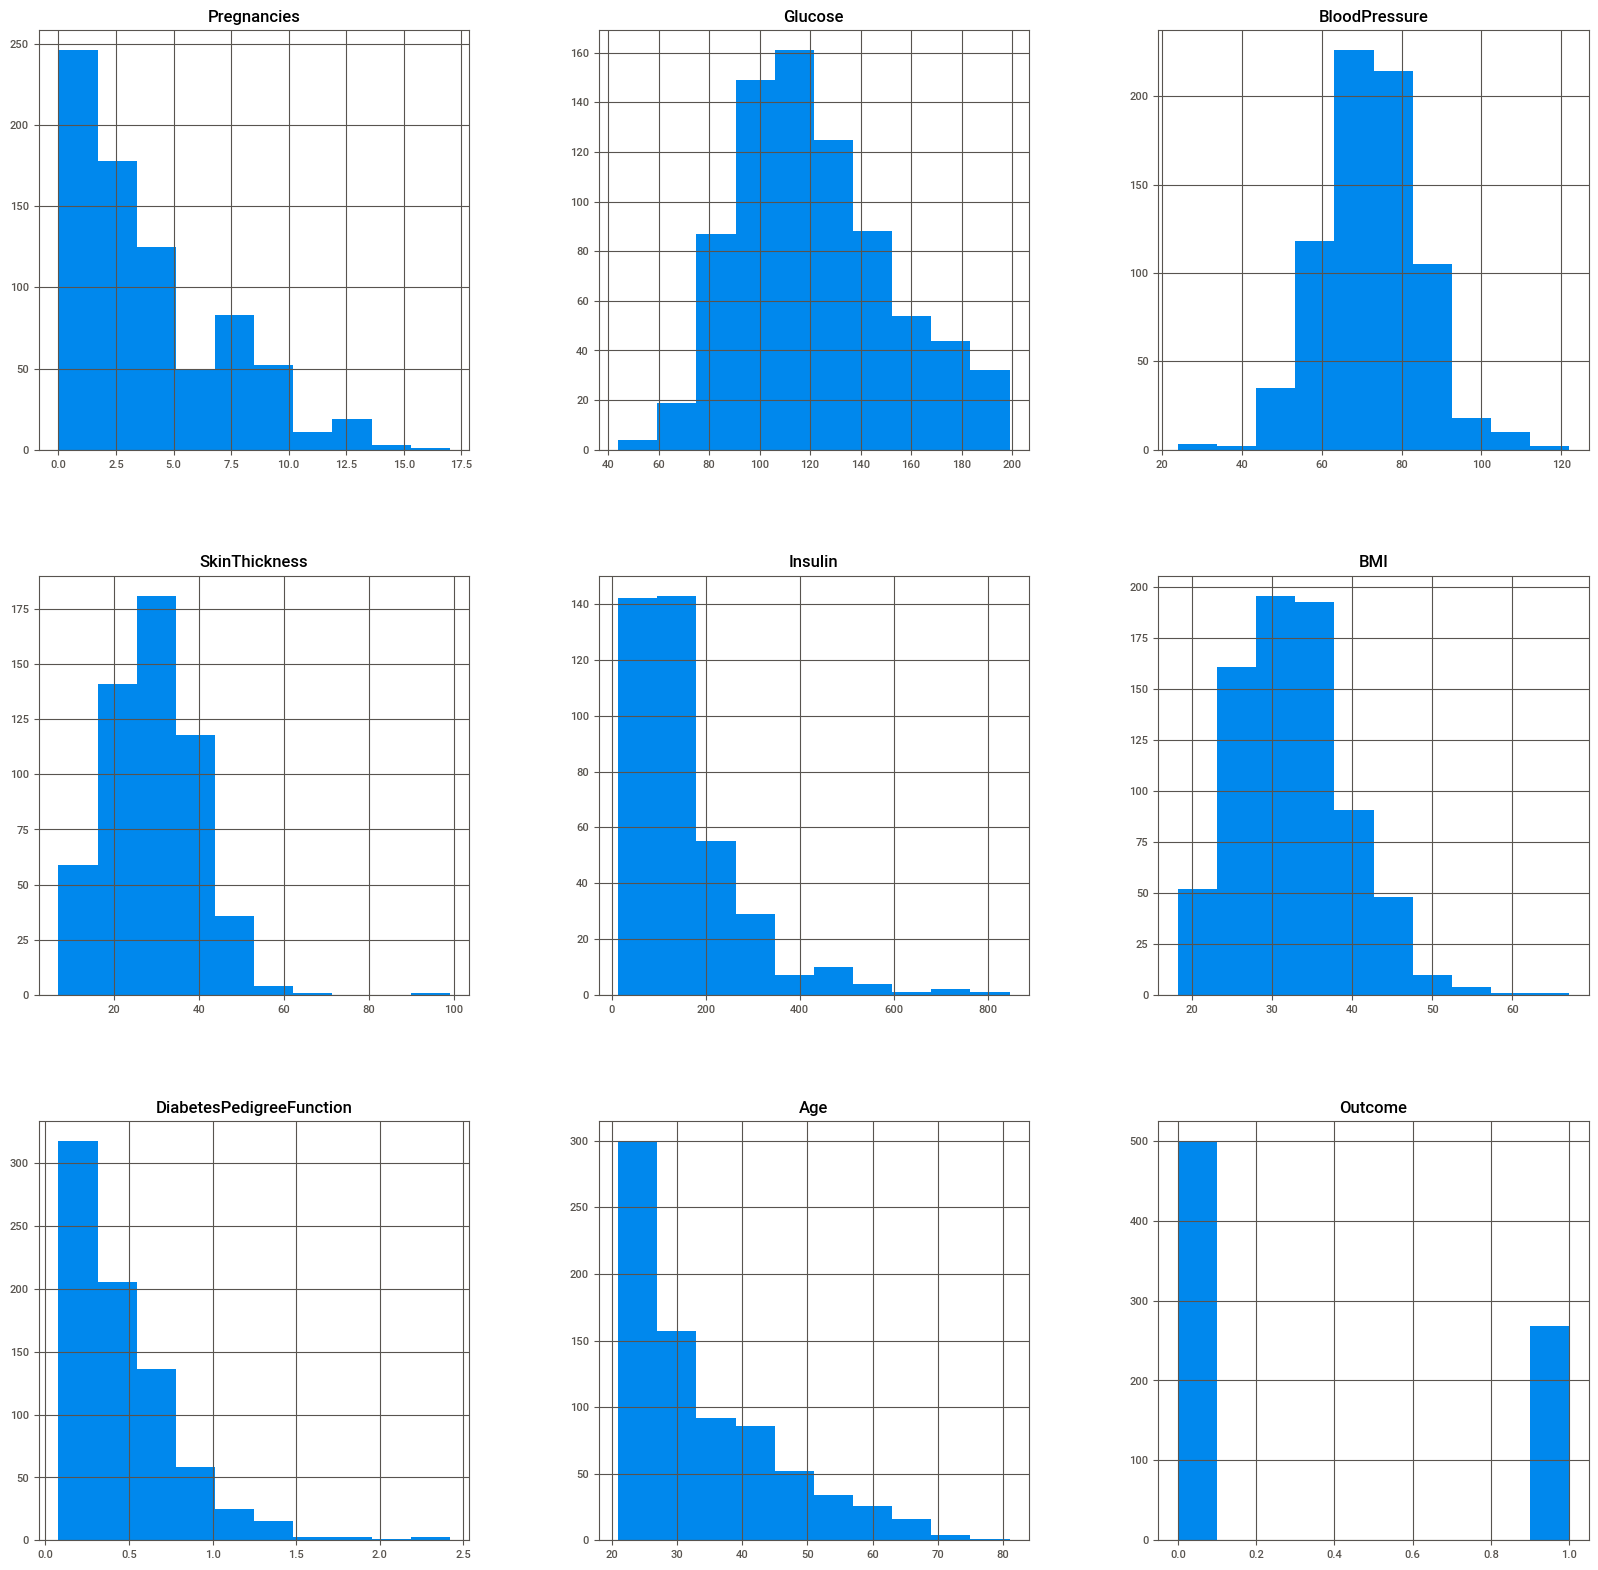

In [11]:
p= dataset.hist(figsize= (20,20))

In [12]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,763.0,121.686763,30.535641,44.000,99.00000,117.0000,141.00000,199.00
BloodPressure,733.0,72.405184,12.382158,24.000,64.00000,72.0000,80.00000,122.00
SkinThickness,541.0,29.153420,10.476982,7.000,22.00000,29.0000,36.00000,99.00
Insulin,394.0,155.548223,118.775855,14.000,76.25000,125.0000,190.00000,846.00
BMI,757.0,32.457464,6.924988,18.200,27.50000,32.3000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [13]:
dataset['Glucose']= dataset['Glucose'].fillna(dataset['Glucose'].mean())

In [14]:
dataset['BloodPressure']= dataset['BloodPressure'].fillna(dataset['BloodPressure'].mean())

In [15]:
dataset['SkinThickness'].mean(),dataset['SkinThickness'].median()

(29.153419593345657, 29.0)

In [16]:
dataset['SkinThickness']= dataset['SkinThickness'].fillna(dataset['SkinThickness'].median())

In [17]:
dataset['Insulin'].mean(),dataset['Insulin'].median()

(155.5482233502538, 125.0)

In [18]:
dataset['Insulin']= dataset['Insulin'].fillna(dataset['Insulin'].median())

In [19]:
dataset['BMI'].mean(),dataset['BMI'].median()

(32.45746367239099, 32.3)

In [20]:
dataset['BMI']= dataset['BMI'].fillna(dataset['BMI'].mean())

In [21]:
for i in range(9):
    print(dataset.columns[i])

Pregnancies
Glucose
BloodPressure
SkinThickness
Insulin
BMI
DiabetesPedigreeFunction
Age
Outcome


In [22]:
report=sv.analyze(dataset)
report.show_html('clean.html')

:FEATURES DONE:                    |█████████████████████| [100%]   00:07  -> (00:00 left)
:PAIRWISE DONE:                    |█████████████████████| [100%]   00:00  -> (00:00 left)


Creating Associations graph... DONE!
Report clean.html was generated! NOTEBOOK/COLAB USERS: no browser will pop up, the report is saved in your notebook/colab files.


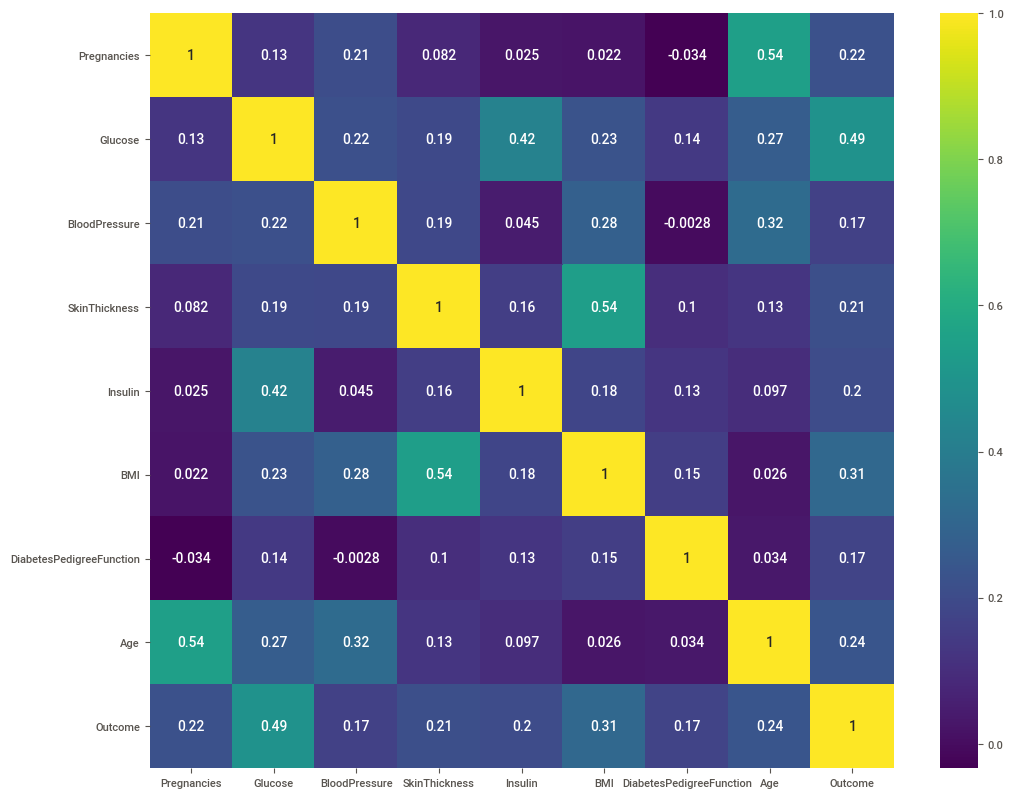

In [23]:
plt.figure(figsize=(12,10))
sns.heatmap(dataset.corr(),annot=True,cmap='viridis')
plt.show()

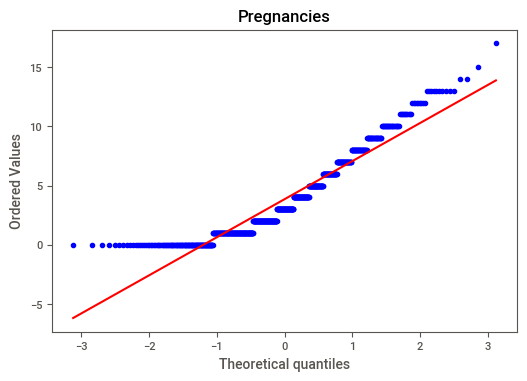

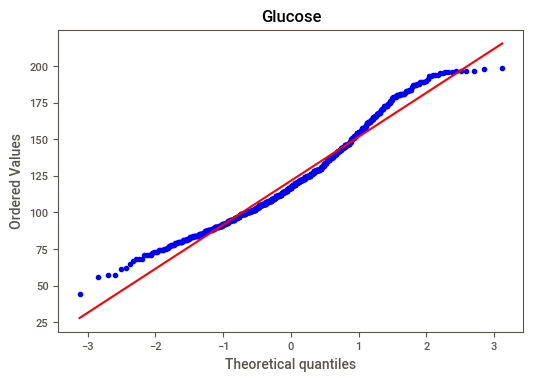

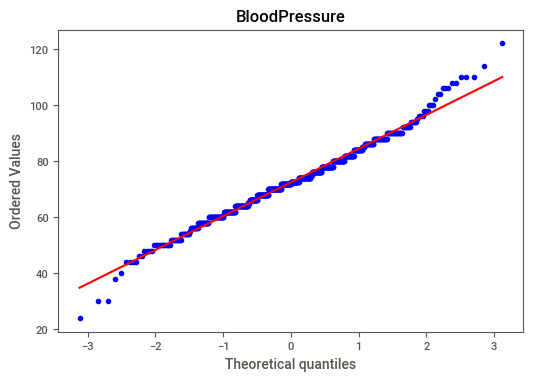

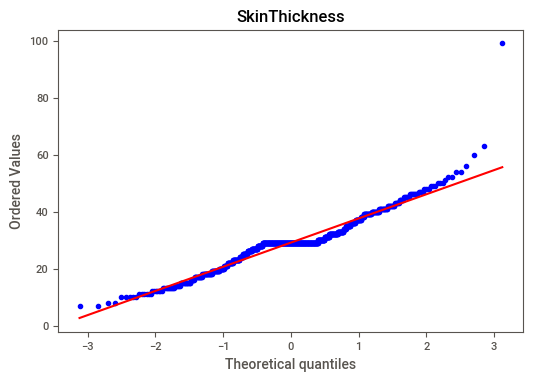

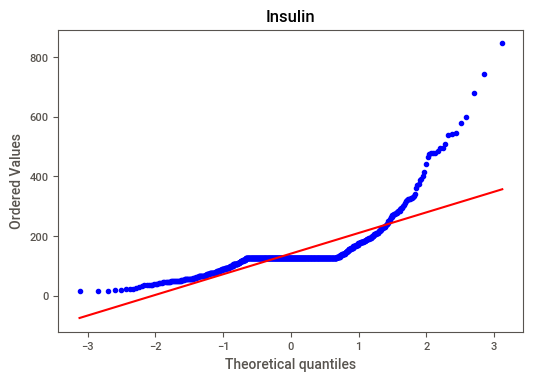

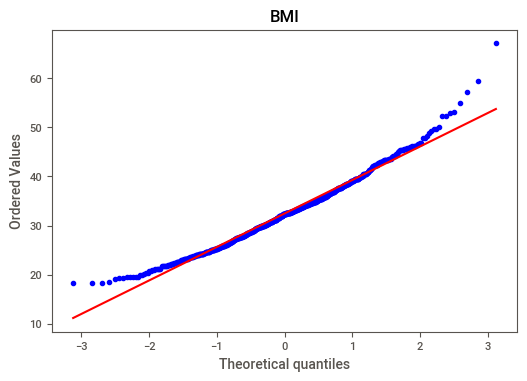

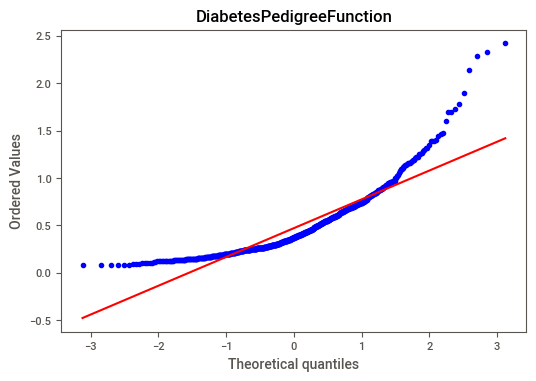

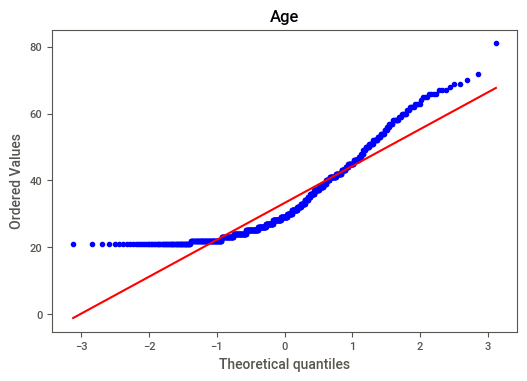

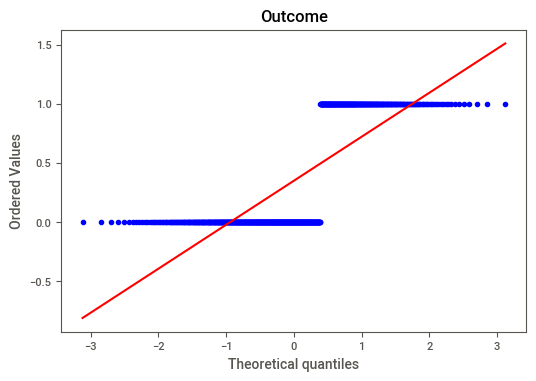

In [24]:
from scipy import stats
for feature in dataset.columns:
    stats.probplot(dataset[feature],plot=plt)
    plt.title(feature)
    plt.show()

In [25]:
from sklearn.preprocessing import StandardScaler
scale= StandardScaler()

In [26]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [27]:
X= dataset.iloc[:, :-1]
y= dataset.iloc[:, -1]

In [28]:
X.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31


In [29]:
y.head(3)

0    1
1    0
2    1
Name: Outcome, dtype: int64

In [38]:
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import pickle



C:\Users\hp\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [39]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=0)

In [47]:
def svm_classifier(X_train,X_test,y_train,y_test):
    classifier_svm= SVC(kernel='rbf', random_state= 0)
    classifier_svm.fit(X_train,y_train)
    y_pred= classifier_svm.predict(X_test)
    cm= confusion_matrix(y_test,y_pred)
    return print (f"Train score: {classifier_svm.score(X_train,y_train)}\nTest score : {classifier_svm.score(X_test,y_test)}")

In [54]:
def knn_classifier(X_train,X_test,y_train,y_test):
    classifier_knn= KNeighborsClassifier(metric='minkowski', p=2)
    classifier_knn.fit(X_train,y_train)
    y_pred= classifier_knn.predict(X_test)
    cm= confusion_matrix(y_test,y_pred)
    return print (f"Train score: {classifier_knn.score(X_train,y_train)}\nTest score : {classifier_knn.score(X_test,y_test)}")

In [55]:
def naive_classifier(X_train,X_test,y_train,y_test):
    classifier_naive= GaussianNB()
    classifier_naive.fit(X_train,y_train)
    y_pred= classifier_naive.predict(X_test)
    cm= confusion_matrix(y_test,y_pred)
    return print (f"Train score: {classifier_naive.score(X_train,y_train)}\nTest score : {classifier_naive.score(X_test,y_test)}")

In [56]:
def tree_classifier(X_train,X_test,y_train,y_test):
    classifier_tree= DecisionTreeClassifier(criterion='entropy', random_state= 0)
    classifier_tree.fit(X_train,y_train)
    y_pred= classifier_tree.predict(X_test)
    cm= confusion_matrix(y_test,y_pred)
    return print (f"Train score: {classifier_tree.score(X_train,y_train)}\nTest score : {classifier_tree.score(X_test,y_test)}")

In [57]:
def forest_classifier(X_train,X_test,y_train,y_test):
    classifier_forest= RandomForestClassifier(criterion='entropy', random_state= 0)
    classifier_forest.fit(X_train,y_train)
    y_pred= classifier_forest.predict(X_test)
    cm= confusion_matrix(y_test,y_pred)
    return print (f"Train score: {classifier_forest.score(X_train,y_train)}\nTest score : {classifier_forest.score(X_test,y_test)}")

In [58]:
def print_score(X_train,X_test,y_train,y_test):
    print("SVM:\n")
    svm_classifier(X_train,X_test,y_train,y_test)
    print("_"*100)
    print()
    
    print("KNN:\n")
    knn_classifier(X_train,X_test,y_train,y_test)
    print("_"*100)
    print()
    
    print("Naive:\n")
    naive_classifier(X_train,X_test,y_train,y_test)
    print("_"*100)
    print()
    
    print("Decision Tree:\n")
    tree_classifier(X_train,X_test,y_train,y_test)
    print("_"*100)
    print()
    
    print("Random Forest:\n")
    forest_classifier(X_train,X_test,y_train,y_test)

In [59]:
print_score(X_train, X_test, y_train, y_test) 

SVM:

Train score: 1.0
Test score : 0.6948051948051948
____________________________________________________________________________________________________

KNN:

Train score: 0.8013029315960912
Test score : 0.7662337662337663
____________________________________________________________________________________________________

Naive:

Train score: 0.745928338762215
Test score : 0.7857142857142857
____________________________________________________________________________________________________

Decision Tree:

Train score: 1.0
Test score : 0.6883116883116883
____________________________________________________________________________________________________

Random Forest:

Train score: 0.9869706840390879
Test score : 0.7857142857142857


In [79]:
#PERFORMANCE METRICS
classifier_forest= RandomForestClassifer(criterion='entropy')
classifier_forest.fit(X_train,y_train)
y_pred= classifier_forest.predict(X_test)
cm= confusion_matrix(y_test,y_pred)
cm


NameError: name 'RandomForestClassifer' is not defined

In [80]:
pd.crosstab(y_test,y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,All
True,,
0,107,107
1,47,47
All,154,154


In [81]:
dataset['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [82]:
from sklearn.metrics import roc_auc_score, roc_curve, classification_report

In [83]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.69      1.00      0.82       107
          1       0.00      0.00      0.00        47

avg / total       0.48      0.69      0.57       154



C:\Users\hp\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [84]:
y_pred_prob= classifier_forest.predict_proba(X_test)[:,1]
y_pred_prob

array([0.9, 0. , 0.1, 0.5, 0.2, 0.1, 0.9, 0.8, 0.4, 0.6, 0.8, 0.7, 0.3,
       0.1, 0.3, 0.7, 0.9, 0. , 0.5, 0.2, 0.4, 0.2, 0.2, 0.4, 0. , 0.6,
       0.1, 0.8, 0. , 0.1, 0.4, 0.2, 0.3, 0.8, 0. , 0.5, 0.5, 0. , 0.2,
       0.7, 0. , 0.1, 0.2, 1. , 0.7, 0.2, 0.1, 0.2, 0.4, 0.1, 0.6, 0.4,
       0.8, 0.5, 0.3, 0. , 0.1, 0.1, 0.4, 0.3, 0.7, 0.6, 0. , 0.5, 1. ,
       0.4, 0.5, 0.2, 0.5, 0.5, 0.1, 0.2, 0. , 0.7, 0.9, 0.5, 0.3, 0.9,
       0. , 0.4, 0.5, 0.4, 0.2, 0. , 0.4, 0.1, 0.1, 0.7, 0.8, 0.2, 0.2,
       0.1, 0.1, 0. , 0.6, 0. , 0.6, 0.4, 0.4, 0.5, 0.3, 0. , 0. , 0. ,
       0.7, 0.7, 0. , 0.5, 0. , 0.5, 0.1, 0.5, 0.5, 0.3, 0.8, 0.6, 0. ,
       0.4, 0. , 0.8, 0.4, 0.8, 0.1, 0.4, 0. , 0. , 0.2, 0.5, 0.4, 0.6,
       0.4, 0.3, 0.2, 0.6, 0.3, 1. , 0. , 0.8, 0.3, 0.1, 0. , 0.6, 0. ,
       0. , 0.7, 0. , 0.1, 0.1, 0.1, 0.4, 0.1, 0.7, 0. , 0.6])

In [85]:
fpr,tpr,threshold= roc_curve(y_test,y_pred_prob)
print('FPR:\n\n', fpr)
print("_"*100)
print("TPR:\n\n", tpr)

FPR:

 [0.         0.00934579 0.03738318 0.08411215 0.1588785  0.22429907
 0.34579439 0.42056075 0.55140187 0.72897196 1.        ]
____________________________________________________________________________________________________
TPR:

 [0.06382979 0.14893617 0.29787234 0.42553191 0.4893617  0.70212766
 0.82978723 0.89361702 0.93617021 1.         1.        ]


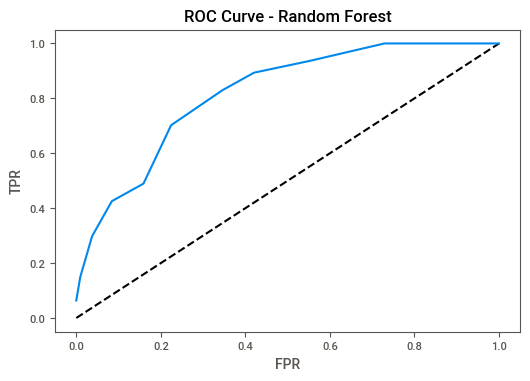

In [86]:
plt.plot([0,1],[0,1], "k--",label='50%AUC')
plt.plot(fpr,tpr,label= "Random Forest")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC Curve - Random Forest")
plt.show()

In [87]:
roc_auc_score(y_test,y_pred_prob)

0.8174587393119904

In [88]:
from sklearn.model_selection import cross_val_score
accuracies= cross_val_score(estimator= classifier_forest, X= X_train, y=y_train, cv=10)
print(accuracies.mean(), accuracies.std())

0.7609289617486338 0.07042493670431058


In [89]:
from sklearn.model_selection import GridSearchCV

In [90]:
parameters = {'n_estimators': [25,50,200,300],'criterion': ['gini', 'entropy'], 'max_depth': [14,20,25,30]}

In [93]:
grid_search= GridSearchCV(estimator = classifier_forest, param_grid= parameters, scoring='accuracy', cv=10, n_jobs=-1)
grid_search= grid_search.fit(X_train,y_train)
print('best_accuracy=',grid_search.best_score_)
print('best_parameters=',grid_search.best_params_)

best_accuracy= 0.7671009771986971
best_parameters= {'criterion': 'gini', 'max_depth': 14, 'n_estimators': 50}


In [94]:
classifier_forest= RandomForestClassifier(criterion='gini',max_depth=25, n_estimators=200, random_state= 0)
classifier_forest.fit(X_train,y_train)
y_pred= classifier_forest.predict(X_test)
cm= confusion_matrix(y_test,y_pred)
cm

array([[93, 14],
       [13, 34]], dtype=int64)

In [95]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.88      0.87      0.87       107
          1       0.71      0.72      0.72        47

avg / total       0.83      0.82      0.83       154



In [102]:
filename= 'diabetes_model.pkl'
pickle.dump(classifier_forest, open(filename, 'wb'))


In [103]:
model= open('diabetes_model.pkl','rb')
forest= pickle.load(model)

In [104]:
y_pred= forest.predict(X_test)

In [105]:
confusion_matrix(y_test, y_pred)

array([[93, 14],
       [13, 34]], dtype=int64)